# Lauranes contribution
    If people with preexisting conditions are more prone to be hospitalized or die


In [2]:
#dependiencis
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr
import requests
import json
import time
from scipy.stats import linregress
from datetime import datetime, timedelta
import plotly
import plotly.express as px
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import init_notebook_mode, plot, iplot
import plotly.io as pio
pio.renderers.default = "notebook_connected"
init_notebook_mode(connected=True)

In [3]:
# Study data files
#world = "Data/world_wide_vaccinations.csv"
owid = "Data/owid-covid-data.csv"

# Read the mouse data and the study results
#world_data = pd.read_csv(world)
owid_data = pd.read_csv(owid)

In [4]:
#world_data.head()
owid_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [5]:
#clean up data
location = owid_data.groupby(['location', 'diabetes_prevalence'], as_index=False).first()
clean_location = location[['location','continent','total_deaths','diabetes_prevalence','total_cases','hosp_patients']]
clean_location

,location,continent,total_deaths,diabetes_prevalence,total_cases,hosp_patients
0,Afghanistan,Asia,1.0,9.59,5.0,NaN
1,Albania,Europe,1.0,10.08,2.0,NaN
2,Algeria,Africa,1.0,6.73,1.0,NaN
3,Andorra,Europe,1.0,7.97,1.0,NaN
4,Angola,Africa,2.0,3.94,1.0,NaN
...,...,...,...,...,...,...
200,Vietnam,Asia,3.0,6.00,2.0,NaN
201,World,None,17.0,8.51,557.0,NaN
202,Yemen,Asia,2.0,5.35,1.0,NaN
203,Zambia,Africa,1.0,3.94,2.0,NaN


In [6]:
# Drop the rows from total_cases rows with no data
clean_location=clean_location.dropna().reset_index(drop=True)
clean_location = clean_location.dropna(how='all')
clean_location

,location,continent,total_deaths,diabetes_prevalence,total_cases,hosp_patients
0,Australia,Oceania,1.0,5.07,4.0,426.0
1,Austria,Europe,1.0,6.35,2.0,1071.0
2,Belgium,Europe,3.0,4.29,1.0,263.0
3,Bolivia,South America,1.0,6.89,2.0,902.0
4,Bulgaria,Europe,1.0,5.81,4.0,210.0
5,Canada,North America,1.0,7.37,2.0,4.0
6,Croatia,Europe,1.0,5.59,1.0,341.0
7,Cyprus,Europe,3.0,9.24,2.0,0.0
8,Czechia,Europe,1.0,6.82,3.0,2.0
9,Denmark,Europe,1.0,6.41,1.0,527.0


In [7]:
#sort the data so you have the top 5 max countries with diabeties prevelance versus the 5 ones with the lowest diabeties
#clean_covid_df['max_total_deaths'] = clean_covid_df.groupby('location')['total_deaths'].transform('max')

fig = px.scatter(clean_location, x='diabetes_prevalence',y='total_deaths', color='location',title='Total Deaths and diabetes prevalence', trendline="ols", trendline_scope="overall")
fig.show()

In [8]:
datadiabetes= clean_location['diabetes_prevalence']
datadeaths= clean_location['total_deaths']
corr1= pearsonr(datadiabetes,datadeaths)
corr1

(0.25147084356534083, 0.127763878057615)

In [9]:
fig = px.scatter(clean_location, x='diabetes_prevalence',y='total_cases', color='location',title='Total cases and Diabetes prevelance', trendline="ols", trendline_scope="overall")
fig.show()

In [10]:
datacases=clean_location['total_cases']
corr2, _ = pearsonr(datadiabetes,datacases)
corr2

0.3616728429585728

In [11]:
fig = px.scatter(clean_location, x='diabetes_prevalence',y='hosp_patients', color='location',title='Total cases and Diabetes prevelance', trendline="ols", trendline_scope="overall")
fig.show()

In [12]:
datahosp=clean_location['hosp_patients']
corr3, _ = pearsonr(datadiabetes,datahosp)
corr3

0.24213463547464326

SyntaxError: invalid syntax (1053918888.py, line 2)

SyntaxError: invalid syntax (2605690075.py, line 2)

AttributeError: module 'statsmodels.api' has no attribute 'clean_location'

ValueError: unrecognized data structures: <class 'str'> / <class 'str'>

SyntaxError: invalid syntax (123864248.py, line 2)

AttributeError: 'DataFrame' object has no attribute 'datadiabetes'

<Figure size 960x800 with 0 Axes>

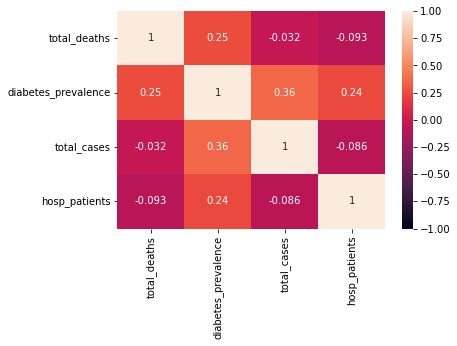

In [31]:
clean_location.corr()
sns.heatmap(clean_location.corr(), vmin=-1, vmax=1, annot=True);